In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cooler
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from HICT_Patterns.hict.patterns.help_functions import get_genome_coords_single, calculate_diag_means, get_chromosome_coords
local_path = 'D:/Study/HICT/HICT_Patterns/'

### Visualisation of results

ValueError: x and y must be the same size

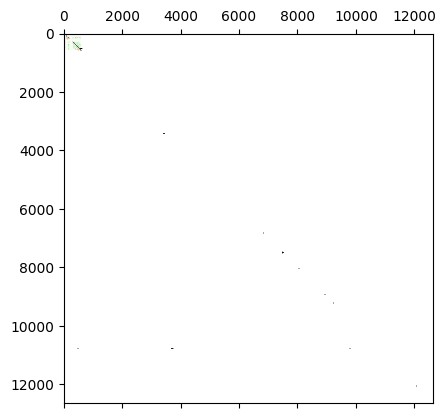

In [27]:
from matplotlib.patches import Rectangle

resolution = 250000
res_result = 25000
c = cooler.Cooler(f'{local_path}data\human\GSM1551620_HIC071_K562.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[8])
chr_number = 8
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/human/k562.csv', sep=';')
trans = trans.astype({'chr': 'str'})
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start_1 // resolution
trans['end_res'] = trans.end_1 // resolution

results = pd.read_csv(f'{local_path}stage4.csv')
#results = results[results.label != '+-']
#results = results[results.bp_1 - results.bp_2>10000]
#results.drop_duplicates(keep=False,inplace=True)
bp_1 =  [x//resolution for chr_num, x in get_chromosome_coords(results.bp_1*res_result, c.chromsizes, 1) if chr_num==8]
bp_2 =  [y//resolution for chr_num, y in get_chromosome_coords(results.bp_2*res_result, c.chromsizes, 1) if chr_num==8]

#results = results[results.chr == 8]
#results = results[results.chr_y == 8]

#results = results[((results['bp_1']<(c.chromsizes[chr_number])//res_result) & (results['bp_2']<(c.chromsizes[chr_number])//res_result))]
#results = results[results.label != 'negative']
#results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(mat_balanced)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=0.1, c='#E9967A')
for index, row in results.iterrows():
    ax.add_patch(Rectangle(((row.bp_1-24)*res_result//resolution, (row.bp_2-24)*res_result//resolution), 48*res_result//resolution, 48*res_result//resolution, fill=False, lw=0.5))

#plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#E9967A')
plt.scatter(bp_1, bp_2,s=10, c='#E9967A')

plt.savefig('output.png', dpi=500)

In [29]:
bp_2

[]

C:\Users\vit\AppData\Local\Temp\ipykernel_6472\2136150128.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[((results['bp_1']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_1']>c.chromsizes[chr_number-1]//res_result)) &
C:\Users\vit\AppData\Local\Temp\ipykernel_6472\2136150128.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((results['bp_2']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_2']>c.chromsizes[chr_number-1]//res_result))]
C:\Users\vit\AppData\Local\Temp\ipykernel_6472\2136150128.py:21: Fu

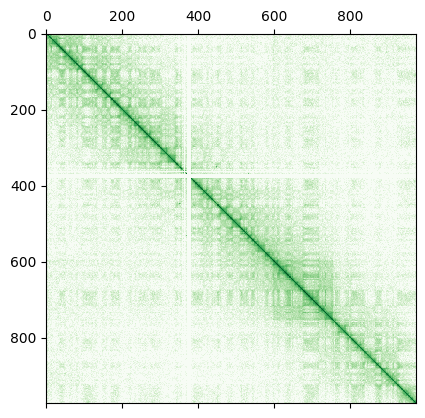

In [7]:
resolution = 250000
res_result = 1

c = cooler.Cooler(f'{local_path}data\human\GSM1551620_HIC071_K562.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[1])
chr_number = 1
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log10(mat_balanced+1)
#trans = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
#trans = trans[trans['chr']==c.chromnames[chr_number]]
#trans['start_res'] = trans.start // resolution
#trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}result.csv')
#results = results[results.chr == 1]
#results = results[results.chr_y == 1]
results = results[((results['bp_1']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_1']>c.chromsizes[chr_number-1]//res_result)) &
                  ((results['bp_2']<(c.chromsizes[chr_number]//res_result+c.chromsizes[chr_number-1]//res_result)) & (results['bp_2']>c.chromsizes[chr_number-1]//res_result))]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]//res_result
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]//res_result
results = results[results.label != 'negative']
results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(matrix)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
#plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#0000FF')

#plt.savefig('output.png', dpi=1000)

C:\Users\vit\AppData\Local\Temp\ipykernel_1744\3304259196.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[((results['bp_1']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result)) &
C:\Users\vit\AppData\Local\Temp\ipykernel_1744\3304259196.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ((results['bp_2']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result))]
C:\Users\vit\AppData\Local\Temp\ipykernel_1744\3304259196.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

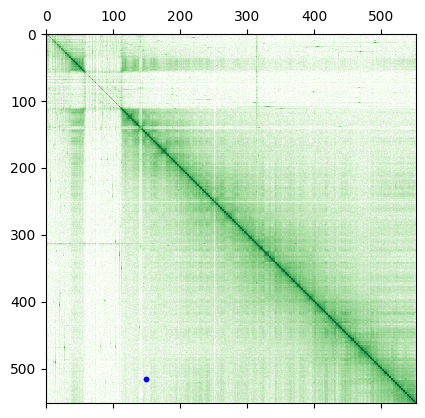

In [24]:
resolution = 100000
res_result = 1

c = cooler.Cooler(f'{local_path}data\ZANU_ARAB/Zanu_Arab_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[2])
chr_number = 2
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log10(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}result.csv')
results = results[((results['bp_1']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result)) &
                  ((results['bp_2']>c.chromsizes[chr_number-1]//res_result+c.chromsizes[chr_number-2]//res_result))]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]//res_result - c.chromsizes[chr_number-2]//res_result
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]//res_result - c.chromsizes[chr_number-2]//res_result
results = results[results.label != 'negative']
results = results[results.label != '+-']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(matrix)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.bp_1*res_result//resolution, results.bp_2*res_result//resolution,s=10, c='#0000FF')

## Calculating metrics

In [5]:
resolution = 5000
c = cooler.Cooler(f'{local_path}data\human\GSM1551620_HIC071_K562.mcool::/resolutions/{resolution}')
answers = pd.read_csv(f'{local_path}data/human/k562.csv', sep=';')
answers['start_res'] = answers.bp_1 // resolution
answers['end_res'] = answers.bp_2 // resolution
answers['bp_1_res'] = get_genome_coords_single(zip(answers['chr'], answers['start_res']), c.chromnames, c.chromsizes, resolution)
answers['bp_2_res'] = get_genome_coords_single(zip(answers['chr'], answers['end_res']), c.chromnames, c.chromsizes, resolution)
results = pd.read_csv(f'{local_path}result_k562.csv')
#results = results[results.label != '+-']
chr_size_sum = c.chromsizes[0]+c.chromsizes[1]+c.chromsizes[2]
results = results[results.bp_1<chr_size_sum]
results = results[results.bp_2<chr_size_sum]
results = results[results.bp_1 - results.bp_2>10000]
results.drop_duplicates(keep=False,inplace=True)
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

tp = 0
fn = len(answers)*2
for index, row in results.iterrows():
    found_x = False
    found_y = False
    for x in answers.bp_1_res:
        if abs(x-row.bp_2) <= 100:
            found_x = True
    for y in answers.bp_2_res:
        if abs(y-row.bp_1) <= 100:
            found_y = True
    if found_x:
        tp+=1
        fn-=1
    if found_y:
        tp+=1
        fn-=1

print(tp)  

0


C:\Users\vit\AppData\Local\Temp\ipykernel_14176\1389878398.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chr_size_sum = c.chromsizes[0]+c.chromsizes[1]+c.chromsizes[2]


In [3]:
results

,bp_1,bp_2,label
3,29600,24297,negative
4,29807,24297,-+
52,29561,28732,negative


In [4]:
answers

,chr,bp_1,bp_2,start_res,end_res,bp_1_res,bp_2_res
0,13,107854000,108009000,21570,21601,438523,438554
1,13,19000000,47000000,3800,9400,420753,426353
2,13,107800000,108000000,21560,21600,438513,438553
3,17,27000000,29000000,5400,5800,505434,505834
4,17,51000000,57000000,10200,11400,510234,511434
5,17,19000000,23000000,3800,4600,503834,504634
6,9,130731000,131000000,26146,26200,333977,334031
7,3,48147000,48186000,9629,9637,108118,108126
8,5,51084000,51094000,10216,10218,186541,186543
9,22,22500000,22700000,4500,4540,570445,570485


In [26]:
precision = tp/(len(results)*2)
recall = tp/(tp+fn)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:',2*(precision*recall)/(precision+recall))

Precision: 0.5625
Recall: 0.75
F1 score: 0.6428571428571429


In [50]:
print(c.chromnames)

['X', '2R', '2L', '3R', '3L', 'scaffold_11', 'scaffold_12', 'scaffold_14', 'scaffold_16', 'scaffold_17', 'scaffold_19', 'scaffold_20', 'scaffold_21', 'scaffold_22', 'scaffold_23', 'scaffold_24', 'scaffold_25', 'scaffold_26', 'scaffold_27', 'scaffold_28', 'scaffold_29', 'scaffold_30', 'scaffold_31', 'scaffold_32', 'scaffold_33', 'scaffold_34', 'scaffold_35', 'scaffold_36', 'scaffold_37', 'scaffold_38', 'scaffold_39', 'scaffold_40', 'scaffold_41', 'scaffold_42', 'scaffold_43', 'scaffold_44', 'scaffold_45', 'scaffold_46', 'scaffold_47', 'scaffold_48', 'scaffold_49', 'scaffold_50', 'scaffold_51', 'scaffold_52', 'scaffold_53', 'scaffold_54', 'scaffold_55', 'scaffold_56', 'scaffold_57', 'scaffold_58', 'scaffold_59', 'scaffold_60', 'scaffold_61', 'scaffold_62', 'scaffold_63', 'scaffold_64', 'scaffold_65', 'scaffold_66', 'scaffold_67', 'scaffold_68', 'scaffold_69', 'scaffold_70', 'scaffold_71', 'scaffold_72', 'scaffold_73', 'scaffold_74', 'scaffold_75', 'scaffold_76', 'scaffold_77', 'scaffold_

In [54]:
resolution = 5000
c = cooler.Cooler(f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[1])
chr_number = 1
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/ARAB_vs_Coluzzii/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}results/result_arab_coluzzii.csv')
results = results[(results['bp_1']<(c.chromsizes[chr_number]+c.chromsizes[chr_number-1])) & (results['bp_1']>c.chromsizes[chr_number-1])]
results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]
results['bp_2'] = results['bp_2'] - c.chromsizes[chr_number-1]
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

for x, y, label in zip(results.bp_1, results.bp_2, results.label):
    point_area = matrix[x - 50:x + 50,y - 50:y + 50]
    plt.imsave(f'{local_path}/results/proof_arab_coluzzii_{x}_{y}_{label}.png',
                                   point_area, cmap='Greens')

C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results = results[(results['bp_1']<(c.chromsizes[chr_number]+c.chromsizes[chr_number-1])) & (results['bp_1']>c.chromsizes[chr_number-1])]
C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results['bp_1'] = results['bp_1'] - c.chromsizes[chr_number-1]
C:\Users\vit\AppData\Local\Temp\ipykernel_3080\2396911790.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

## EagleC Results 

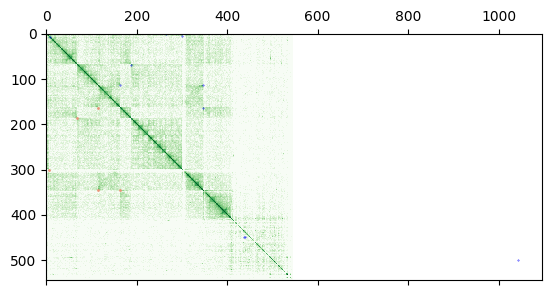

In [4]:
resolution = 50000
c = cooler.Cooler(f'{local_path}data/ZANU_ARAB/Zanu_Arab_4DN.mcool::/resolutions/{resolution}')
mat_balanced = c.matrix(balance=False).fetch(c.chromnames[0])
chr_number = 0
#matrix = MatrixVisualise.log_matrix(MatrixVisualise.calculate_diag_means(mat_balanced, scf_desc,scf_desc),addition=0,remove_zeros=False)
matrix = np.log2(mat_balanced+1)
trans = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
trans = trans[trans['chr']==c.chromnames[chr_number]]
trans['start_res'] = trans.start // resolution
trans['end_res'] = trans.end // resolution
#ans_x = get_genome_coords_single(zip(trans['chr'], trans['start_res']), c.chromnames, c.chromsizes, resolution)
#ans_y = get_genome_coords_single(zip(trans['chr'], trans['end_res']), c.chromnames, c.chromsizes, resolution)

results = pd.read_csv(f'{local_path}data/eaglec_results/ARAB_vs_Coluzzii_4DN.CNN_SVs.5K_combined.txt', sep='\t')
results = results[results['chrom1']=='X']

fig = plt.figure()
ax = fig.add_subplot(111)
#im = ax.matshow(np.log10(calculate_diag_means(mat_balanced)), cmap='Greens')
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(trans['start_res'], trans['end_res'],s=1, c='#E9967A')

plt.scatter(results.pos2//resolution, results.pos1//resolution,s=.1, c='#0000FF')

plt.savefig('output.png', dpi=1000)

In [25]:
results

,chrom1,pos1,chrom2,pos2,++,+-,-+,--
0,X,270000,X,15015000,1.000000e+00,1.534000e-21,8.542000e-27,1.000000e+00
1,X,50000,X,13260000,6.512000e-27,9.875000e-01,1.000000e+00,2.018000e-27
2,X,3430000,X,9375000,3.502000e-02,4.320000e-25,2.291000e-27,1.000000e+00
3,X,5745000,X,17330000,2.225000e-23,5.319000e-15,1.000000e+00,1.381000e-19
4,X,5740000,X,8165000,1.000000e+00,2.276000e-23,1.869000e-18,4.308000e-19
5,X,8170000,X,17330000,2.090000e-15,8.589000e-15,1.766000e-19,1.000000e+00
6,X,355000,X,405000,3.378000e-19,9.996000e-01,6.782000e-17,3.018000e-17


In [5]:
resolution = 1000
c = cooler.Cooler(f'{local_path}data/ZANU_ARAB/Zanu_Arab_4DN.mcool::/resolutions/{resolution}')
answers = pd.read_csv(f'{local_path}data/mauve_zanu_arab/proof_patterns.csv')
#answers = answers[answers.label != 'copy_gain']
answers['start_res'] = answers.start // resolution
answers['end_res'] = answers.end // resolution
answers['bp_1'] = get_genome_coords_single(zip(answers['chr'], answers['start_res']), c.chromnames, c.chromsizes, resolution)
answers['bp_2'] = get_genome_coords_single(zip(answers['chr'], answers['end_res']), c.chromnames, c.chromsizes, resolution)
results = pd.read_csv(f'{local_path}data/eaglec_results/Zanu_Arab_4DN.CNN_SVs.5K_combined.txt', sep='\t')
results['bp_1'] = get_genome_coords_single(zip(results['chrom1'], results['pos1']), c.chromnames, c.chromsizes, resolution)
results['bp_2'] = get_genome_coords_single(zip(results['chrom1'], results['pos2']), c.chromnames, c.chromsizes, resolution)
results.bp_1 = results.bp_1//resolution
results.bp_2 = results.bp_2//resolution

tp = 0
fn = len(answers)*2
for index, row in results.iterrows():
    found_x = False
    found_y = False
    for x in answers.bp_2:
        if abs(x-row.bp_2) <= 5:
            found_x = True
    for y in answers.bp_1:
        if abs(y-row.bp_1) <= 5:
            found_y = True
    if found_x:
        tp+=1
        fn-=1
    if found_y:
        tp+=1
        fn-=1

print(tp)

5


In [6]:
precision = tp/(len(results)*2)
recall = tp/(tp+fn)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:',2*(precision*recall)/(precision+recall))

Precision: 0.052083333333333336
Recall: 0.4166666666666667
F1 score: 0.0925925925925926


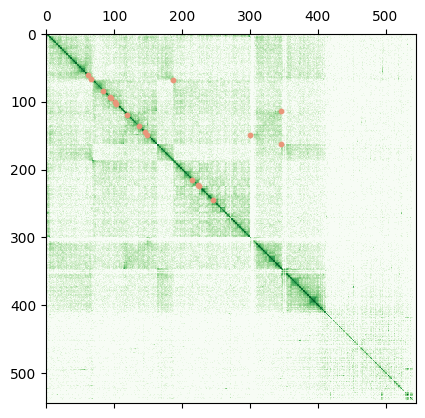

In [6]:

resolution = 50000
file_path = f'{local_path}data\ARAB_vs_Coluzzii\ARAB_vs_Coluzzii_4DN.mcool'
chr_name = 'X'
chr_name_second = ''
result_file_name = f'{local_path}result_Arab_Coluzzii_new.csv'
if len(chr_name_second) == 0:
    chr_name_second = chr_name


c = cooler.Cooler(f'{file_path}::/resolutions/{resolution}')
matrix = np.log2(c.matrix(balance=False).fetch(chr_name, chr_name_second)+1)

results = pd.read_csv(result_file_name)
bp_1 =  [x//resolution for chr_number, x in get_chromosome_coords(results.bp_1, c.chromsizes, 1) if chr_number==c.chromnames.index(chr_name)]
bp_2 =  [y//resolution for chr_number, y in get_chromosome_coords(results.bp_2, c.chromsizes, 1) if chr_number==c.chromnames.index(chr_name_second)]


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(matrix, cmap='Greens')
plt.scatter(bp_1, bp_2, s=10, c='#E9967A')